In [2]:
# -*- coding: utf-8 -*-
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
from matplotlib import pyplot
#from xgboost import XGBRegressor
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import TruncatedSVD
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.metrics import mean_squared_error

In [10]:
train_df = pd.read_excel('Final_Train.xlsx')
test_df = pd.read_excel('Final_Test.xlsx')
#sub_df = pd.read_excel('Sample_submission.xlsx')

In [11]:
print("Lookup on train data",train_df.head())
print("Shape of train data",train_df.shape)
print("Null value in train data set", train_df.isnull().sum())
print("Lookup into test data",test_df.head())
print("Sum of Null value in test ",test_df.isnull().sum())

Lookup on train data                     Qualification           Experience Rating  \
0           BHMS, MD - Homeopathy  24 years experience      1   
1    BAMS, MD - Ayurveda Medicine  12 years experience    98%   
2  MBBS, MS - Otorhinolaryngology   9 years experience    NaN   
3             BSc - Zoology, BAMS  12 years experience    NaN   
4                            BAMS  20 years experience   100%   

                          Place         Profile  \
0           Kakkanad, Ernakulam       Homeopath   
1         Whitefield, Bangalore        Ayurveda   
2    Mathikere - BEL, Bangalore  ENT Specialist   
3  Bannerghatta Road, Bangalore        Ayurveda   
4         Keelkattalai, Chennai        Ayurveda   

                                  Miscellaneous_Info  Fees  
0               100% 16 Feedback Kakkanad, Ernakulam   100  
1              98% 76 Feedback Whitefield, Bangalore   350  
2                                                NaN   300  
3  Bannerghatta Road, Bangalore ₹250 

Extract String from exp

In [12]:
train_df['Experience'] = train_df['Experience'].str[0:-17].astype(int)
test_df['Experience'] = test_df['Experience'].str[0:-17].astype(int)

Extarct Rating string

In [13]:
train_df['Rating'] = train_df['Rating'].str[0:-1].astype(float)
test_df['Rating'] = test_df['Rating'].str[0:-1].astype(float)

Fill the null value in place

In [14]:
train_df['Place'].fillna('none, none', inplace=True)
test_df['Place'].fillna('none, none', inplace=True)

Extract the Area and City from place

In [15]:
train_df['Area'] = train_df['Place'].str.rsplit(',', 1).str.get(0)
train_df['City'] = train_df['Place'].str.rsplit(',', 1).str.get(1)
test_df['Area'] = test_df['Place'].str.rsplit(',', 1).str.get(0)
test_df['City'] = test_df['Place'].str.split(',', 1).str.get(1)

In [16]:
train_df['City'] = train_df['City'].str.strip()
test_df['City'] = test_df['City'].str.strip()

In [19]:
print("Lookup data after extraction",train_df.head())
print("Unique value for city After Extraction",train_df['City'].unique())
print("Unique value for city After Extraction",test_df['City'].unique())

Lookup data after extraction                     Qualification  Experience  Rating  \
0           BHMS, MD - Homeopathy          24     NaN   
1    BAMS, MD - Ayurveda Medicine          12    98.0   
2  MBBS, MS - Otorhinolaryngology           9     NaN   
3             BSc - Zoology, BAMS          12     NaN   
4                            BAMS          20   100.0   

                          Place         Profile  \
0           Kakkanad, Ernakulam       Homeopath   
1         Whitefield, Bangalore        Ayurveda   
2    Mathikere - BEL, Bangalore  ENT Specialist   
3  Bannerghatta Road, Bangalore        Ayurveda   
4         Keelkattalai, Chennai        Ayurveda   

                                  Miscellaneous_Info  Fees               Area  \
0               100% 16 Feedback Kakkanad, Ernakulam   100           Kakkanad   
1              98% 76 Feedback Whitefield, Bangalore   350         Whitefield   
2                                                NaN   300    Mathikere - BEL 

In [20]:
print("Null vaule",train_df[train_df['City'].isnull()])
train_df.loc[train_df['City'].isnull(), 'Area'] = 'none'
train_df['City'] = train_df['City'].fillna('none')

Null vaule Empty DataFrame
Columns: [Qualification, Experience, Rating, Place, Profile, Miscellaneous_Info, Fees, Area, City]
Index: []


In [21]:
train_df['City'].unique()
train_df['Area'].nunique()

867

In [22]:
train_df['Profile'].unique()
test_df['Profile'].unique()

array(['General Medicine', 'ENT Specialist', 'Dermatologists', 'Ayurveda',
       'Dentist', 'Homeopath'], dtype=object)

bitwise operator to check Misc info present or not 1 or 0

In [23]:
train_df['Has_M_Info'] = (~train_df['Miscellaneous_Info'].isnull())
test_df['Has_M_Info'] = (~test_df['Miscellaneous_Info'].isnull())
train_df['Has_M_Info'] = train_df['Has_M_Info'].astype(int)
test_df['Has_M_Info'] = test_df['Has_M_Info'].astype(int)

In [24]:
print("Look up after Misc info",train_df.head())

Look up after Misc info                     Qualification  Experience  Rating  \
0           BHMS, MD - Homeopathy          24     NaN   
1    BAMS, MD - Ayurveda Medicine          12    98.0   
2  MBBS, MS - Otorhinolaryngology           9     NaN   
3             BSc - Zoology, BAMS          12     NaN   
4                            BAMS          20   100.0   

                          Place         Profile  \
0           Kakkanad, Ernakulam       Homeopath   
1         Whitefield, Bangalore        Ayurveda   
2    Mathikere - BEL, Bangalore  ENT Specialist   
3  Bannerghatta Road, Bangalore        Ayurveda   
4         Keelkattalai, Chennai        Ayurveda   

                                  Miscellaneous_Info  Fees               Area  \
0               100% 16 Feedback Kakkanad, Ernakulam   100           Kakkanad   
1              98% 76 Feedback Whitefield, Bangalore   350         Whitefield   
2                                                NaN   300    Mathikere - BEL   
3 

In [25]:
quals = pd.DataFrame(item for item in train_df['Qualification'].str.split(', '))
print("Qualification is",quals.head())

Qualification is                0                         1     2     3     4     5     6  \
0           BHMS           MD - Homeopathy  None  None  None  None  None   
1           BAMS    MD - Ayurveda Medicine  None  None  None  None  None   
2           MBBS  MS - Otorhinolaryngology  None  None  None  None  None   
3  BSc - Zoology                      BAMS  None  None  None  None  None   
4           BAMS                      None  None  None  None  None  None   

      7     8     9  
0  None  None  None  
1  None  None  None  
2  None  None  None  
3  None  None  None  
4  None  None  None  


In [26]:
print("Null for Qualification",quals.isnull().sum())

Null for Qualification 0       0
1    1962
2    4598
3    5592
4    5842
5    5926
6    5949
7    5956
8    5958
9    5960
dtype: int64


In [27]:
for i in range(10):
    print(quals[i].nunique())

151
425
405
209
95
32
12
5
3
1


In [28]:
print("value count for Qualifivation", quals[0].value_counts())

value count for Qualifivation MBBS                                                     2448
BDS                                                      1208
BAMS                                                      711
BHMS                                                      706
MD - Dermatology                                           84
                                                         ... 
BUMS                                                        1
Diplomate of National Board Exam                            1
MDS - Public Health Dentistry                               1
MA - Psychology                                             1
MDS - Oral & Maxillofacial Pathology and Microbiology       1
Name: 0, Length: 151, dtype: int64


In [29]:
vecz = TfidfVectorizer(analyzer='word')
vecz.fit(train_df['Qualification'])

TfidfVectorizer()

In [30]:
qual_train = vecz.transform(train_df['Qualification'])
qual_test = vecz.transform(test_df['Qualification'])

Singular Value Decomposition (SVD) is a matrix factorization technique that<br>
factors a matrix M into the three matrices U, Î£, and V. This is very similar to PCA,<br>
excepting that the factorization for SVD is done on the data matrix, whereas for PCA,<br>
the factorization is done on the covariance matrix. Typically, SVD is used under the hood to<br>
find the principle components of a matrix.

In [32]:
svd = TruncatedSVD(n_components=20)
svd.fit(qual_train)

TruncatedSVD(n_components=20)

In [33]:
print("Variance sum ",svd.explained_variance_ratio_.sum())
print("Variance ratio",svd.explained_variance_ratio_)

Variance sum  0.7305583496447728
Variance ratio [0.0651461  0.0932571  0.08841786 0.09215534 0.06995137 0.04716524
 0.04335796 0.03863571 0.02726825 0.02072666 0.0194238  0.01691491
 0.01640643 0.01555545 0.01513248 0.01454681 0.01366477 0.01325753
 0.01008341 0.00949118]


In [34]:
qual_train = svd.transform(qual_train)
qual_train = pd.DataFrame(qual_train, columns=['svd_{}'.format(i) for i in range(20)])
train_df = pd.concat((train_df, qual_train), axis=1)

In [35]:
qual_test = svd.transform(qual_test)
qual_test = pd.DataFrame(qual_test, columns=['svd_{}'.format(i) for i in range(20)])
test_df = pd.concat((test_df, qual_test), axis=1)

In [36]:
train_df.to_csv("train.csv")
test_df.to_csv("test.csv")
Y=train_df["Fees"].values
X=train_df.drop(['Fees'],axis=1)
array = X.values
X = array[:,8:30]
#Y = array[:,6]
validation_size = 0.20
seed = 7
X_train, X_validation, Y_train, Y_validation = train_test_split(X, Y,test_size=validation_size, random_state=seed)

Test options and evaluation metric

In [37]:
num_folds = 10
seed = 7
scoring = 'neg_mean_squared_error'

Spot-Check Algorithms

In [39]:
models = []
models.append(('LR', LinearRegression()))
#models.append(('XGB', XGBRegressor()))
models.append(('LASSO', Lasso()))
models.append(('EN', ElasticNet()))
models.append(('KNN', KNeighborsRegressor()))
models.append(('CART', DecisionTreeRegressor()))
models.append(('SVR', SVR()))

evaluate each model in turn

In [40]:
results = []
names = []
for name, model in models:
    kfold = KFold(n_splits=num_folds, random_state=seed,shuffle=True)
    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

LR: -31072.562944 (1852.081257)
LASSO: -31285.951558 (1870.688128)
EN: -35096.040396 (1803.987070)
KNN: -36051.128393 (2985.189850)
CART: -38828.741903 (3880.739417)
SVR: -33103.346182 (2038.210821)


Lowest negtive MSE is for LR followed by LASSO

R: -31072.127725 (1852.614533)<br>
GB: -32960.497059 (2147.411868)<br>
ASSO: -31285.753686 (1870.626560)<br>
N: -35096.030674 (1803.986785)<br>
NN: -35964.710138 (3502.354681)<br>
ART: -39118.208803 (4076.907318)<br>
VR: -33103.136033 (2038.209706)

Compare Algorithms

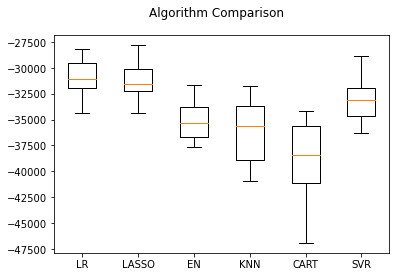

In [41]:
fig = pyplot.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
pyplot.boxplot(results)
ax.set_xticklabels(names)
pyplot.show()

Evaluate Algorithms: Standardization

Standardize the dataset

In [42]:
pipelines = []
pipelines.append(('ScaledLR', Pipeline([('Scaler', StandardScaler()),('LR',LinearRegression())])))
#pipelines.append(('ScaledLR', Pipeline([('Scaler', StandardScaler()),('XGB',XGBRegressor())])))
pipelines.append(('ScaledLASSO', Pipeline([('Scaler', StandardScaler()),('LASSO', Lasso())])))
pipelines.append(('ScaledEN', Pipeline([('Scaler', StandardScaler()),('EN', ElasticNet())])))
pipelines.append(('ScaledKNN', Pipeline([('Scaler', StandardScaler()),('KNN', KNeighborsRegressor())])))
pipelines.append(('ScaledCART', Pipeline([('Scaler', StandardScaler()),('CART', DecisionTreeRegressor())])))
pipelines.append(('ScaledSVR', Pipeline([('Scaler', StandardScaler()),('SVR', SVR())])))
results = []
names = []
for name, model in pipelines:
    kfold = KFold(n_splits=num_folds, random_state=seed,shuffle=True)
    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

ScaledLR: -31072.562944 (1852.081257)
ScaledLASSO: -31057.242659 (1826.051320)
ScaledEN: -31605.145057 (1711.225469)
ScaledKNN: -35398.525048 (2657.353729)
ScaledCART: -38641.250261 (3883.254334)
ScaledSVR: -34017.275806 (2012.881677)


After Scaling below output gives lowest MSE for LR, LASSO and EN<br>
caledLR: -31073.285058 (1852.428878)<br>
caledLR: -33000.053603 (2380.501922)<br>
caledLASSO: -31057.987851 (1826.336022)<br>
caledEN: -31605.583914 (1711.448216)<br>
caledKNN: -35694.351220 (2920.487089)<br>
caledCART: -38696.891647 (4262.623551)<br>
caledSVR: -34017.125788 (2013.529279)

Compare Algorithms

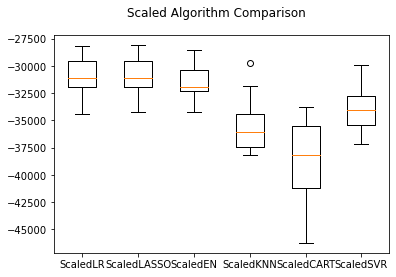

In [43]:
fig = pyplot.figure()
fig.suptitle('Scaled Algorithm Comparison')
ax = fig.add_subplot(111)
pyplot.boxplot(results)
ax.set_xticklabels(names)
pyplot.show()

Algorithm tuning

In [44]:
scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)
k_values = np.array([1,0.1,0.01,0.001,0.0001,0])
param_grid = dict(alpha=k_values)
model = Lasso()
kfold = KFold(n_splits=num_folds, random_state=seed,shuffle=True)
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=kfold)
grid_result = grid.fit(rescaledX, Y_train)
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
print("Best Estimator",grid.best_estimator_.alpha)
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("mean, Standard Deviation and params %f (%f) with: %r" % (mean, stdev, param))

Best: -31057.281471 using {'alpha': 1.0}
Best Estimator 1.0
mean, Standard Deviation and params -31057.281471 (1825.958144) with: {'alpha': 1.0}
mean, Standard Deviation and params -31070.047866 (1848.697096) with: {'alpha': 0.1}
mean, Standard Deviation and params -31072.317018 (1851.704050) with: {'alpha': 0.01}
mean, Standard Deviation and params -31072.538036 (1852.043620) with: {'alpha': 0.001}
mean, Standard Deviation and params -31072.560465 (1852.077491) with: {'alpha': 0.0001}
mean, Standard Deviation and params -31072.562944 (1852.081257) with: {'alpha': 0.0}


valuate four different ensemble machine learning<br>
lgorithms, two boosting and two bagging methods:<br>
 Boosting Methods: AdaBoost (AB) and Gradient Boosting (GBM).<br>
 Bagging Methods: Random Forests (RF) and Extra Trees (ET).

ensembles

In [45]:
ensembles = []
ensembles.append(('ScaledAB', Pipeline([('Scaler', StandardScaler()),('AB',AdaBoostRegressor())])))
ensembles.append(('ScaledGBM', Pipeline([('Scaler', StandardScaler()),('GBM', GradientBoostingRegressor())])))
ensembles.append(('ScaledRF', Pipeline([('Scaler', StandardScaler()),('RF', RandomForestRegressor())])))
ensembles.append(('ScaledET', Pipeline([('Scaler', StandardScaler()),('ET', ExtraTreesRegressor())])))

In [46]:
results = []
names = []
for name, model in ensembles:
    kfold = KFold(n_splits=num_folds, random_state=seed,shuffle=True)
    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

ScaledAB: -32350.328803 (2019.519921)
ScaledGBM: -30414.168890 (2077.219802)
ScaledRF: -31831.866834 (2640.642120)
ScaledET: -32803.016476 (2705.305745)


Output is best for GBM<br>
caledAB: -32203.544297 (2290.880793)<br>
caledGBM: -30424.137942 (2154.809940)<br>
caledRF: -31673.784577 (2543.114782)<br>
caledET: -32788.928779 (2697.184527)

Compare Algorithms

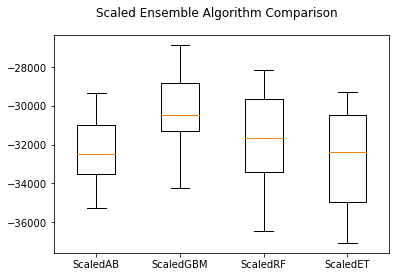

In [47]:
fig = pyplot.figure()
fig.suptitle('Scaled Ensemble Algorithm Comparison')
ax = fig.add_subplot(111)
pyplot.boxplot(results)
ax.set_xticklabels(names)
pyplot.show()

Tune Ensemble Methods<br>
GBM<br>
Tune scaled GBM

In [48]:
scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)
param_grid = dict(n_estimators=np.array([50,100,150,200,250,300,350,400]))
model = GradientBoostingRegressor(random_state=seed)
kfold = KFold(n_splits=num_folds, random_state=seed,shuffle=True)
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=kfold)
grid_result = grid.fit(rescaledX, Y_train)
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: -30257.298803 using {'n_estimators': 50}
-30257.298803 (2025.134215) with: {'n_estimators': 50}
-30423.054378 (2084.049446) with: {'n_estimators': 100}
-30620.956053 (2191.387375) with: {'n_estimators': 150}
-30861.248704 (2261.687307) with: {'n_estimators': 200}
-31053.412464 (2249.428658) with: {'n_estimators': 250}
-31308.272921 (2310.524143) with: {'n_estimators': 300}
-31462.367174 (2281.566524) with: {'n_estimators': 350}
-31633.425221 (2247.427535) with: {'n_estimators': 400}


##Finalize the Model<br>
 prepare the model

In [49]:
scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)
model = GradientBoostingRegressor(random_state=seed, n_estimators=400)
model.fit(rescaledX, Y_train)

GradientBoostingRegressor(n_estimators=400, random_state=7)

transform the validation dataset

In [50]:
rescaledValidationX = scaler.transform(X_validation)
predictions = model.predict(rescaledValidationX)
print(mean_squared_error(Y_validation, predictions))

32354.324403446233


Run final test data

In [51]:
final_df=test_df.values
Y_final=final_df[:,8:29]
final_prediction=model.predict(Y_final)
print(final_prediction)
final_prediction_res=pd.DataFrame(final_prediction,columns=['Fees']).round(decimals=0)
final_prediction_res.to_excel("Final_Submission.xlsx",index=False)

[312.79349594 259.6103618  325.38736378 ... 270.30037986 347.7262519
 354.63052073]
